In [1]:
from astropy.io import ascii
import numpy as np
import glob

Cat=ascii.read("../A-Catalogs/Binospec-Candels.cat")
files=glob.glob("Completeness/*.npy")
mask=[]
for file in files:
    f=np.array(np.load(file))
    f = f.flatten()
    if np.isnan(np.array(f, dtype=float)).sum() > len(f) / 2:
        mask.append(False)
    else:
        mask.append(True)

files=np.array(files)[mask]



In [3]:
Completeness=[]
for nummer in range(0,len(files)):
    temp=[]
    for index_fwhm in range(0, 7):
        temp1=[]
        for index_flux in range(0, 7):
            C_file=np.load(files[nummer])
            temp1.append(np.sum(np.transpose(C_file[index_fwhm][index_flux])[0].astype(float)))
        temp.append(temp1)
    Completeness.append(temp)

Completeness=np.nanmean(Completeness, axis=0)/100


In [4]:
print(np.load(files[0])[1][-1])

[['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796e-17']
 ['1' '141.66666666666669' '3.1622776601683796

In [5]:
np.log10(3.1e-17)

-16.50863830616573

In [6]:
Completeness

array([[0.05263158, 0.06766917, 0.22556391, 0.86466165, 1.        ,
        1.        , 1.        ],
       [0.06015038, 0.06015038, 0.06015038, 0.23308271, 0.93984962,
        1.        , 1.        ],
       [0.06015038, 0.06015038, 0.06015038, 0.06766917, 0.4962406 ,
        0.97744361, 1.        ],
       [0.06015038, 0.06015038, 0.06015038, 0.06015038, 0.18796992,
        0.87969925, 1.        ],
       [0.06015038, 0.06015038, 0.06015038, 0.06015038, 0.07518797,
        0.63909774, 1.        ],
       [0.06015038, 0.06015038, 0.06015038, 0.06015038, 0.08270677,
        0.42857143, 0.9924812 ],
       [0.06015038, 0.06015038, 0.06015038, 0.06015038, 0.07518797,
        0.31578947, 0.96992481]])

In [7]:
gridFlux=np.log10(10**np.linspace(-18,-16.5,7))
gridFWHM=np.linspace(50,600,7)

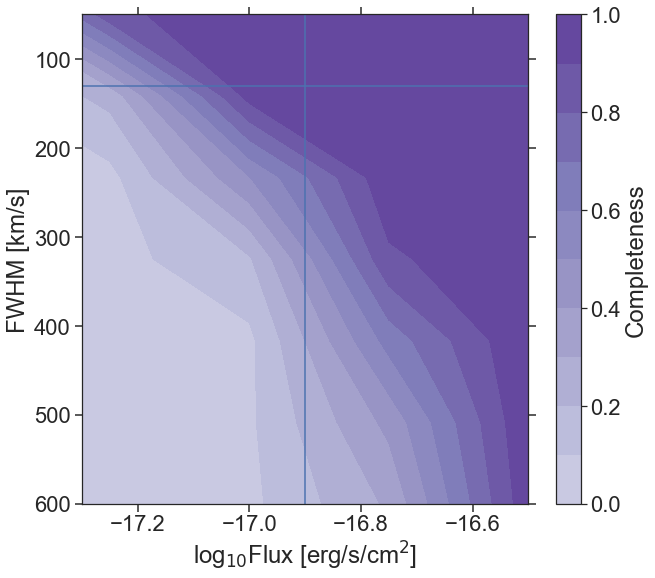

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from palettable.cartocolors.sequential import BurgYl_7


#Completeness = np.mean(Value_percentage, axis=0).reshape(7, 7)/100

sns.set_theme(style="ticks", font_scale=2)
plt.rcParams["figure.figsize"] = (10., 9.)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Use a continuous colormap
cmap = plt.cm.get_cmap('Purples')
new_cmap = truncate_colormap(cmap, 0.3, 0.8)
fig, ax = plt.subplots()


#Completeness = np.where((Completeness > 0) & (Completeness < 1), np.minimum(Completeness , 1), Completeness)

CS = ax.contourf(gridFlux, gridFWHM, Completeness, cmap=new_cmap,levels=np.linspace(0, 1, 11))
cbar = fig.colorbar(CS, ax=ax, label='Completeness')

ax.set_xlim(-17.3, -16.5)

ax.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True, zorder=100)
plt.axvline(-16.9)
plt.axhline(130)
ax.invert_yaxis()
ax.set_xlabel(r"log$_{10}$Flux [erg/s/cm$^\mathrm{2}$]")
ax.set_ylabel("FWHM [km/s]")
plt.savefig("Figures/Completeness.png", dpi=200, bbox_inches="tight")
plt.show()


In [21]:
np.log10(1.2e-17)

-16.920818753952375

In [278]:
np.log10(10**np.linspace(-17.3,-15.5,7))

array([-17.3, -17. , -16.7, -16.4, -16.1, -15.8, -15.5])

In [140]:
odd_grid_values = np.log10(gridFlux[::2])
print(odd_grid_values)

[-18.         -16.95048776 -16.66927827 -16.50000009]


In [142]:
np.log10(gridFlux)

array([-18.        , -17.21440006, -16.95048776, -16.78750916,
       -16.66927827, -16.57644327, -16.50000009])

In [115]:
1.162277e-17

1.162277e-17

In [122]:
np.round(np.log10(gridFlux),1)

array([-18. , -17.2, -17. , -16.8, -16.7, -16.6, -16.5])